In [1]:
# import torch
from PIL import Image
import cv2
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("/home/timssh/ML/TAGGING/best.pt")  # load a pretrained model (recommended for training)

def yolo(im, size=640):
    g = (size / max(im.size))  # gain
    im = im.resize((int(x * g) for x in im.size), Image.ANTIALIAS)  # resize

    results = model(im)  # inference
    # results.render()  # updates results.imgs with boxes and labels
    return Image.fromarray(results[0].plot())


In [2]:
# img = cv2.imread('/home/timssh/ML/TAGGING/6a4b9fa464a67a2c7b6cb21fbccb6f6f.jpeg')
# img = cv2.resize(img, (640, 480))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = Image.open('/home/timssh/ML/TAGGING/DATA/picture/0a0b30ab3dc98111d8b169554f337440.jpeg')
img1 = img1.resize((640, 480))
img2 = Image.open('/home/timssh/ML/TAGGING/DATA/picture/0a0c2a621bceb4d2da2e28aea9244b22.jpeg')
img2 = img2.resize((640, 480))
img3 = Image.open('/home/timssh/ML/TAGGING/DATA/picture/0a0c46cb20a1afd0b264a488efabb8ee.jpeg')
img3 = img3.resize((640, 480))
res = model.predict([img1, img2, img3], conf=0.5)
# res = model(T.ToTensor()(img).unsqueeze(0))
res_plotted = res[0].plot()
cv2.imwrite('res_plotted.jpg', res_plotted)


0: 480x640 2 girls, 1 man, 1: 480x640 1 girl, 1 man, 2: 480x640 1 girl, 1 man, 66.2ms
Speed: 1.5ms preprocess, 22.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


True

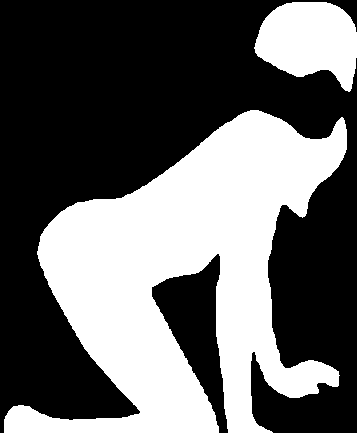

In [3]:
from ultralytics import YOLO
from torchvision import transforms as T
from PIL import Image
import cv2
import torch
import numpy as np

# model = YOLO('yolov8n-seg.pt')
# results = model('https://ultralytics.com/images/bus.jpg', imgsz=640)
# img = cv2.imread('bus.jpg')
# img = cv2.resize(img, (480, 640))

for result in res:
    for mask, bbox in zip(result.masks, result.boxes):
        r = bbox.xyxy[0].to(int)
T.ToPILImage()(mask.data[:, r[1]:r[3], r[0]:r[2]])

In [4]:
result.save_txt('res.txt')

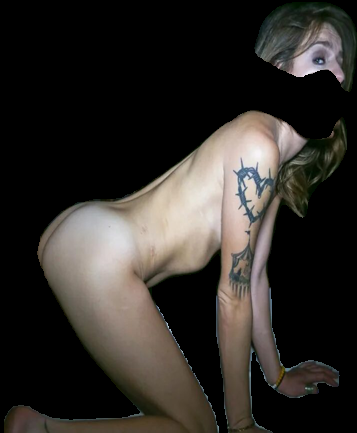

In [5]:
T.ToPILImage()(T.ToTensor()(np.array(img3)[r[1]:r[3], r[0]:r[2]]) * mask.data[:, r[1]:r[3], r[0]:r[2]].to('cpu'))

In [6]:
import kornia as K

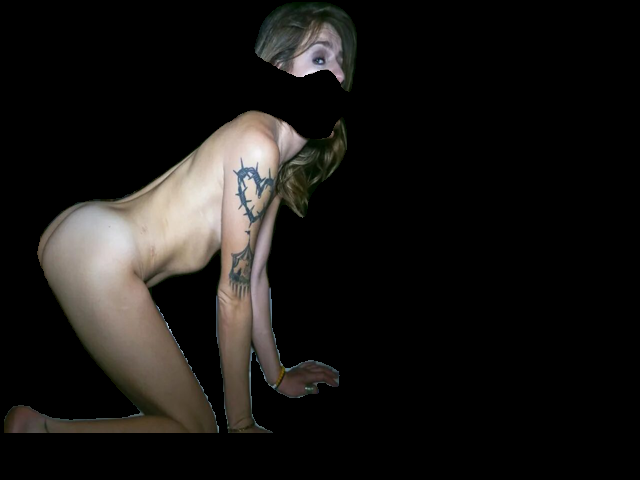

In [7]:
T.ToPILImage()(K.augmentation.PadTo((480, 640), keepdim=True)(T.ToTensor()(np.array(img3)[r[1]:r[3], r[0]:r[2]]) * mask.data[:, r[1]:r[3], r[0]:r[2]].to('cpu')))

In [8]:
bbox

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[164.6786,  46.3313, 521.2537, 479.6127,   0.9823,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.9823], device='cuda:0')
data: tensor([[164.6786,  46.3313, 521.2537, 479.6127,   0.9823,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (480, 640)
shape: torch.Size([1, 6])
xywh: tensor([[342.9661, 262.9720, 356.5751, 433.2815]], device='cuda:0')
xywhn: tensor([[0.5359, 0.5479, 0.5571, 0.9027]], device='cuda:0')
xyxy: tensor([[164.6786,  46.3313, 521.2537, 479.6127]], device='cuda:0')
xyxyn: tensor([[0.2573, 0.0965, 0.8145, 0.9992]], device='cuda:0')

In [9]:
res_dict = {}
with open('res.txt', 'r') as opened_file:
    lines = opened_file.readlines()
    for line in lines:
        line = line.split(' ')
        res_dict[line[0]] = line[1:]

res_dict
    

{'1': ['0.165625',
  '0.00833333',
  '0.164062',
  '0.0104167',
  '0.160938',
  '0.0104167',
  '0.154687',
  '0.01875',
  '0.154687',
  '0.0208333',
  '0.148438',
  '0.0291667',
  '0.148438',
  '0.03125',
  '0.145313',
  '0.0354167',
  '0.145313',
  '0.0375',
  '0.142188',
  '0.0416667',
  '0.142188',
  '0.04375',
  '0.139062',
  '0.0479167',
  '0.139062',
  '0.0520833',
  '0.1375',
  '0.0541667',
  '0.1375',
  '0.05625',
  '0.135937',
  '0.0583333',
  '0.135937',
  '0.0604167',
  '0.134375',
  '0.0625',
  '0.134375',
  '0.0645833',
  '0.132812',
  '0.0666667',
  '0.132812',
  '0.06875',
  '0.13125',
  '0.0708333',
  '0.13125',
  '0.075',
  '0.129688',
  '0.0770833',
  '0.129688',
  '0.0791667',
  '0.128125',
  '0.08125',
  '0.128125',
  '0.0833333',
  '0.126563',
  '0.0854167',
  '0.126563',
  '0.0895833',
  '0.125',
  '0.0916667',
  '0.125',
  '0.0979167',
  '0.123438',
  '0.1',
  '0.123438',
  '0.104167',
  '0.121875',
  '0.10625',
  '0.121875',
  '0.108333',
  '0.120312',
  '0.1104

In [10]:
import numpy as np

def read_objects_from_txt(txt_file):
    with open(txt_file, 'r') as f:
        lines = f.readlines()

    objects = []
    for line in lines:
        data = list(map(float, line.strip().split(' ')))
        class_index = int(data[0])
        points = np.array(data[1:]).reshape(-1, 2)
        objects.append({
            'class_index': class_index,
            'points': points,
        })

    return objects

def create_binary_mask(image_shape, objects):
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    for obj in objects:
        class_index = obj['class_index']
        points = obj['points']

        # Scale back the points to the (640, 480) image dimensions
        points[:, 0] *= 640
        points[:, 1] *= 480

        # Convert points to integer coordinates
        points = points.round().astype(np.int32)

        # Draw the contour on the mask with white color
        cv2.drawContours(mask, [points], -1, (255), thickness=cv2.FILLED)

    return mask

# Example usage:
txt_file_path = '/home/timssh/ML/TAGGING/CLS/instance/notes/res.txt'
output_path = 'output.npy'

# Read the objects from the text file
objects = read_objects_from_txt(txt_file_path)

# Create binary masks from the objects and merge them into a single mask
merged_mask = create_binary_mask((480, 640), objects)

# Save the merged binary mask as a NumPy array
np.save(output_path, merged_mask)

print("Binary mask saved successfully.")


Binary mask saved successfully.


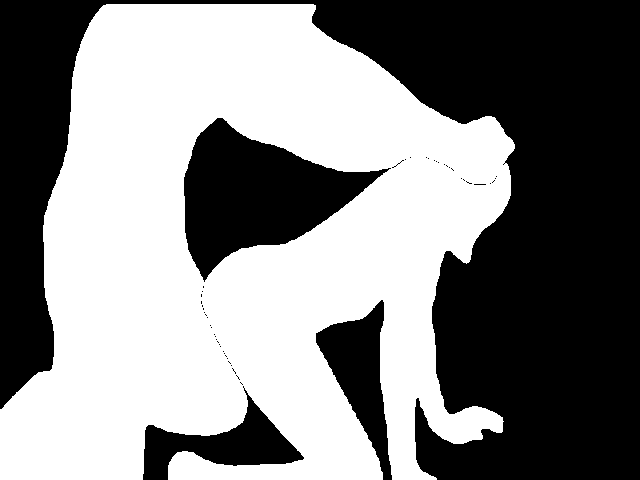

In [11]:
Image.fromarray(merged_mask)

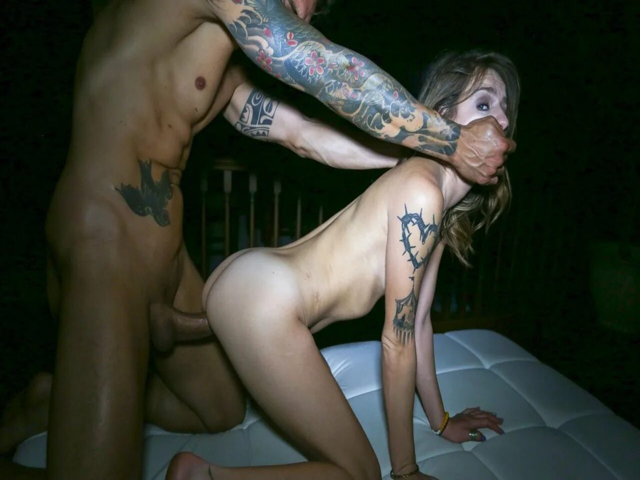

In [12]:
img3

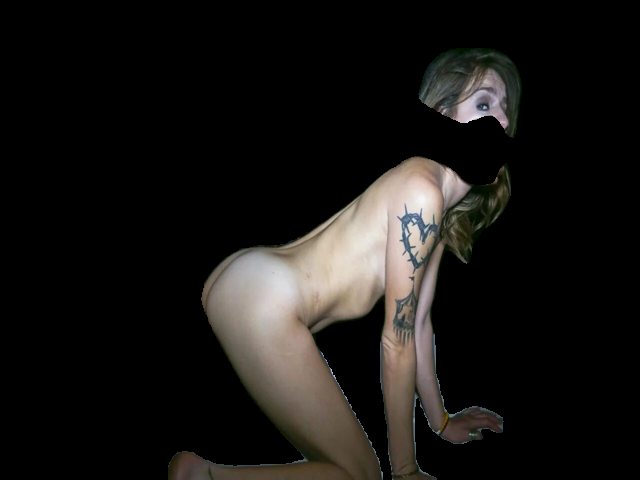

In [13]:
T.ToPILImage()(T.ToTensor()(np.array(img3)) * mask.data[:].to('cpu'))

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import transforms as T
from PIL import Image


def image_to_tensor(path):
    image = Image.open(path)
    image = T.Resize((480, 640))(image)
    return T.ToTensor()(image.convert("RGB"))
    # return T.ToTensor()(tensor)


class InferDataset(Dataset):
    """
    Description:
        Torch DataSet for inference.
        :data: list
        :transforms: nn.Sequential
    """

    def __init__(
        self,
        data: list,
        transforms: nn.Sequential = None,
    ):
        self.data = data
        self.transforms = transforms

    def parse_data(self, data):
        img = image_to_tensor(data)
        img_id = data.split("/")[-1]
        return img, img_id.split(".")[0]

    @torch.no_grad()
    def __getitem__(self, idx):
        data = self.data[idx]
        img, img_id = self.parse_data(data)
        if self.transforms:
            img = self.transforms(img)
        return img[:].to(torch.float32), img_id

    def __len__(self):
        return len(self.data)


In [3]:
from glob import glob

data = glob("/home/timssh/ML/TAGGING/DATA/picture/*")
data[:5]

['/home/timssh/ML/TAGGING/DATA/picture/2256591d83c165d2eca42648ce9360e6.jpeg',
 '/home/timssh/ML/TAGGING/DATA/picture/b3cfbdb93a00d42ff6339f73b5ca2a25.jpeg',
 '/home/timssh/ML/TAGGING/DATA/picture/c4aeec54a55eac367c7ba320ad3d8122.jpeg',
 '/home/timssh/ML/TAGGING/DATA/picture/6a8198050f670454dcb759f2e4b4df68.jpeg',
 '/home/timssh/ML/TAGGING/DATA/picture/8d7b032119f4710948374bce46364abb.jpeg']

In [4]:
ds = InferDataset(data)
im = ds[0][0].unsqueeze(0)

In [5]:
im.shape

torch.Size([1, 3, 480, 640])

In [6]:
res = model(im)
res_plotted = res[0].plot()
cv2.imwrite('res_plotted_1.jpg', res_plotted)


0: 480x640 1 girl, 60.3ms
Speed: 1.2ms preprocess, 60.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


True

In [19]:
# Create a random torch tensor of BCHW shape (1, 3, 640, 640) with values in range [0, 1] and type float32
source = torch.rand(1, 3, 640, 640, dtype=torch.float32)

# Run inference on the source
results = model(source)  # list of Results objects


0: 640x640 (no detections), 11.1ms
Speed: 1.6ms preprocess, 11.1ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


In [20]:
type(source)

torch.Tensor

In [21]:
type(im)

torch.Tensor

In [22]:
source.copy()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 source.copy()                                                                                │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'Tensor' object has no attribute 'copy'

In [19]:
tensor_image = T.ToPILImage()(im[0] * res[0].masks.data)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [25]:
tensor_image.save('tensor_image.jpeg')

In [15]:
bbox = res[0].boxes.xyxy[0].to(torch.float16)
bbox[0], bbox[2] = bbox[0]/ 640, bbox[2]/640
bbox[1], bbox[3] = bbox[1]/ 480, bbox[3]/480
bbox

tensor([0.0497, 0.0274, 0.9111, 0.9849], device='cuda:0', dtype=torch.float16)

In [35]:
res[0].boxes[0].conf

tensor([0.9870], device='cuda:0')

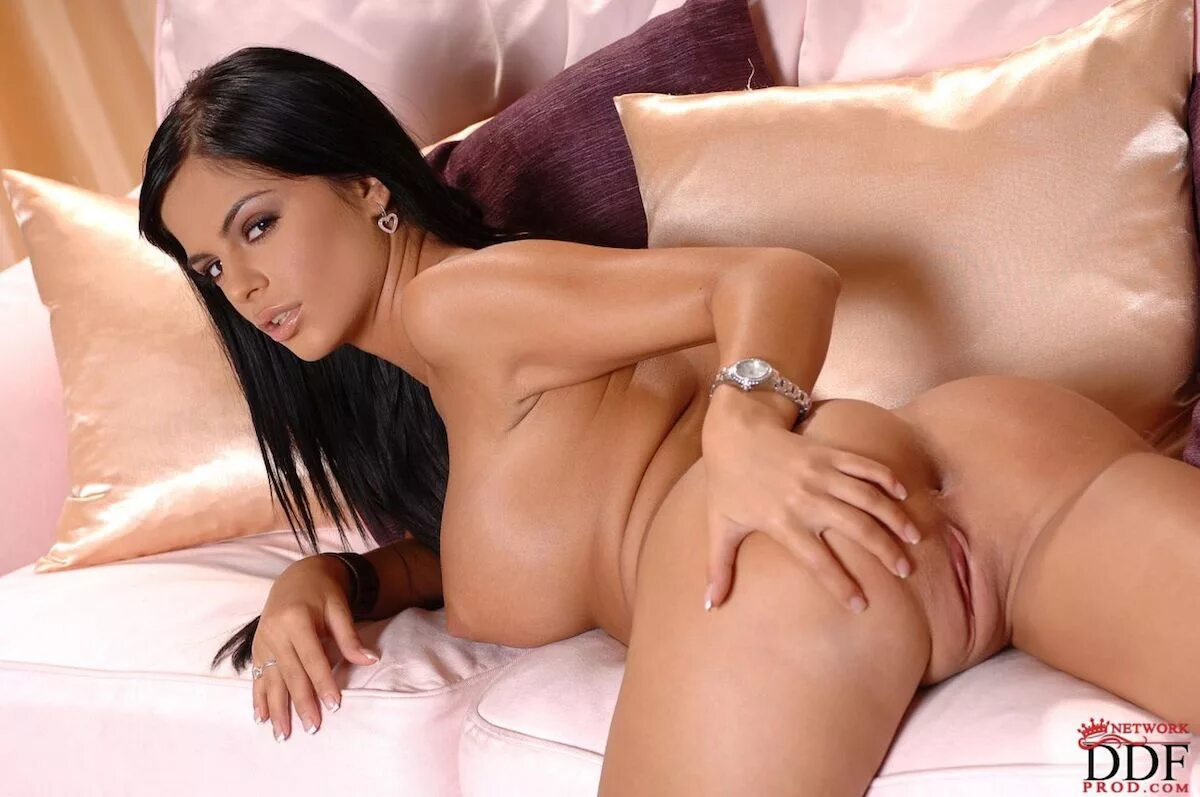

In [33]:
Image.open('/home/timssh/ML/TAGGING/DATA/picture/bbf4a366b74bfa653315258adcd86ad2.jpeg')